In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.utils import to_categorical

sns.set(style = 'white', context = 'notebook', palette = 'deep')

## 1. 데이터 불러오기

In [7]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


## 2. 데이터 전처리

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

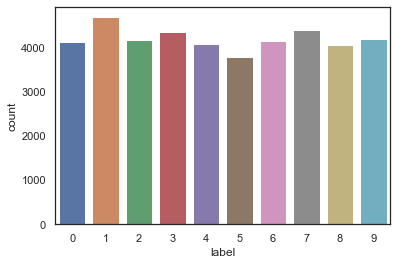

In [8]:
# train의 'label'을 y_train, x_train으로 가져오기
y_train = train['label']
x_train = train.drop(labels = ['label'], axis = 1)

# del train

g = sns.countplot(y_train)
y_train.value_counts()

### 2-1. missing value와 null 데이터 확인하기

In [9]:
x_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [10]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

### 2-2. 정규화

In [11]:
x_train = x_train / 255.0
test = test / 255.0

### 2-3. 차원 변경

In [12]:
x_train = x_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

print(x_train.shape)
print(test.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


### 2-4. One-Hot Encoding

In [15]:
y_train = to_categorical(y_train, num_classes = 10)

print(y_train.shape)

(42000, 10, 10)


### 2-5. train, test 데이터 split해주기

In [16]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.1, random_state = 2,
                                                  shuffle = True)

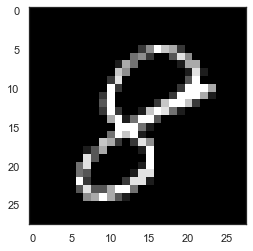

In [18]:
# 예시 데이터 출력
plt.imshow(x_train[0][:, :, 0], 'gray')

## 3. CNN Modeling

In [19]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same',
                 input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(filters = 16, kernel_size = (3, 3),
                 padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(rate = 0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3),
                 padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = (3, 3),
                 padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(rate = 0.25))

model.add(Conv2D(filters = 64, kernel_size = (5, 5),
                 padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (5, 5),
                 padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)         

In [21]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'rmsprop')

In [23]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',
                                            patience = 3,
                                            verbose = 1,
                                            factor = 0.5,
                                            min_lr = 0.00001)

In [26]:
histrory = model.fit(x_train, y_train,
                     batch_size = 512,
                     epochs = 5,
                     validation_data = (x_val, y_val))

ValueError: Error when checking target: expected dense_2 to have 2 dimensions, but got array with shape (37800, 10, 10)